In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew,norm,zscore
%matplotlib inline
fifa = pd.read_csv('fifa.csv')

In [2]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [4]:
#DATA PREPROCESSING

In [5]:
fifa = fifa.drop(columns=['Photo','Club Logo','Flag'])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
a = fifa['Value'].apply(lambda d: d[1:])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0

fifa['Current_Value']= a.apply(value_to_float)
fifa['Current_Value'] = fifa['Current_Value'].replace({0.0:np.nan})
fifa['Current_Value'].fillna(value=fifa['Current_Value'].mean(),inplace=True)
fifa['Current_Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Current_Value, dtype: float64

In [7]:
a = fifa['Wage'].apply(lambda d: d[1:])
fifa['Current_Wage']= a.apply(value_to_float)
fifa['Current_Wage'] = fifa['Current_Wage'].replace({0.0:np.nan})
fifa['Current_Wage'].fillna(value=fifa['Current_Wage'].mean(),inplace=True)
fifa['Current_Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Current_Wage, dtype: float64

In [8]:
a= fifa['Joined'].fillna(value=0)
b = a.apply(lambda d: (str(d))[-4:])
fifa['Year_Joined'] = b.astype(int)
fifa['Year_Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Year_Joined, dtype: int32

In [9]:
from datetime import datetime

In [10]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [11]:
a= fifa['Height'].fillna(value=000.0)
fifa['Height_Convert'] = a.apply(lambda d: (float((str(d))[0])*12)+float((str(d))[2:]))
fifa['Height_Final'] = fifa['Height_Convert'].replace({0.0:np.nan})
fifa['Height_Final'].fillna(value=fifa['Height_Final'].mean(),inplace=True)
fifa['Height_Final'].head()

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height_Final, dtype: float64

In [12]:
a= fifa['Weight'].fillna(value=00.00)
fifa['Weight_Convert'] = a.apply(lambda d: float(str(d).replace('lbs','')))
fifa['Weight_Final'] = fifa['Weight_Convert'].replace({0.0:np.nan})
fifa['Weight_Final'].fillna(value=fifa['Weight_Final'].mean(),inplace=True)
fifa['Weight_Final'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight_Final, dtype: float64

In [13]:
i = fifa['Release Clause'].fillna(value='€00.00').apply(lambda s: s[1:])
fifa['Release_Clause']= i.apply(value_to_float)
fifa['Release_Clause'] = fifa['Release_Clause'].replace({0.0:np.nan})
fifa['Release_Clause'].fillna(value=fifa['Release_Clause'].mean(),inplace=True)
fifa['Release_Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release_Clause, dtype: float64

In [14]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Current_Value', 'Current_Wage', 'Year_Joined',
       'Height_Convert', 'Height_Final', 'Weight_Convert', 'Weight_Final',
       'Release_Clause'],
     

In [15]:
#1.Plot the distribution of Overall rating for all players.

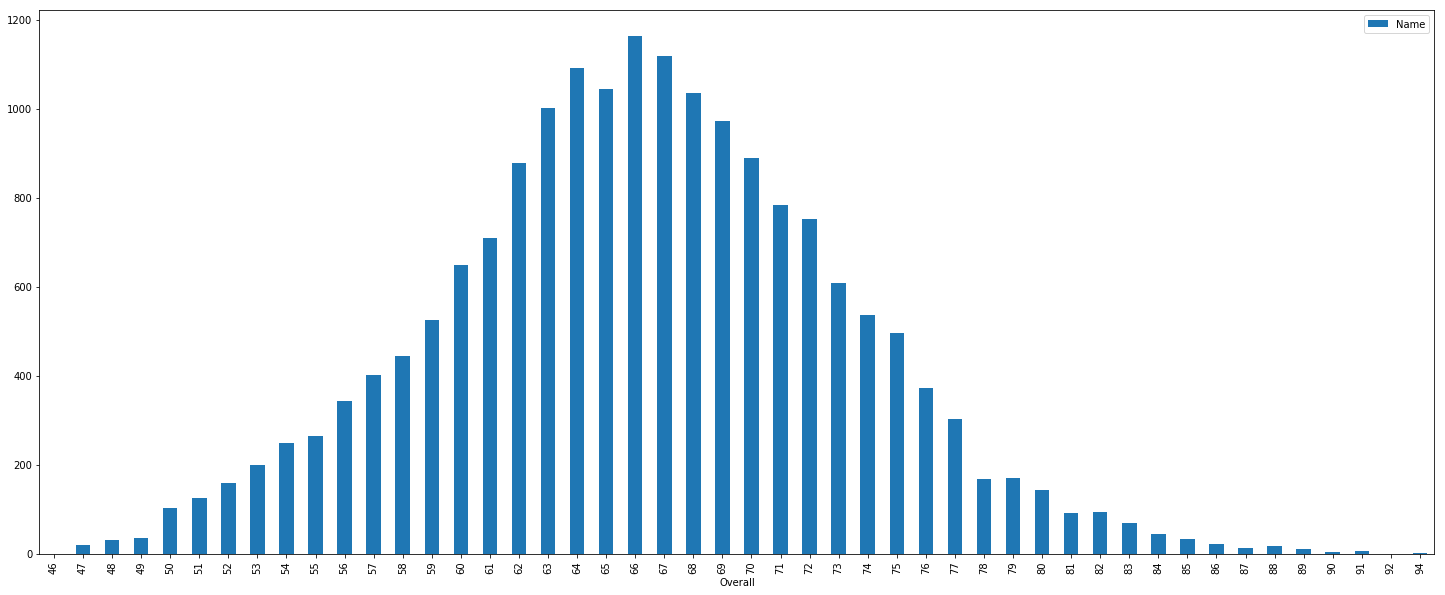

In [16]:
fifa.groupby(['Overall']).agg({'Name':'count'}).plot.bar(figsize=(25,10))
plt.show()

In [17]:
#Above graph represents the number of players having a certain overall rating

In [18]:
fifa = fifa.drop(columns=['Value', 'Wage','Joined',
       'Height_Convert', 'Height', 'Weight_Convert', 'Weight'])

In [19]:
fifa = fifa.drop(columns = ['Release Clause'])

In [20]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Loaned From', 'Contract Valid Until', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Current_Value',
       'Current_Wage', 'Year_Joined', 'Height_Final', 'Weight_Final',
       'Release_Clause'],
      dtype='object')

In [21]:
#2.Generate pair plots for the following variables:
#Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

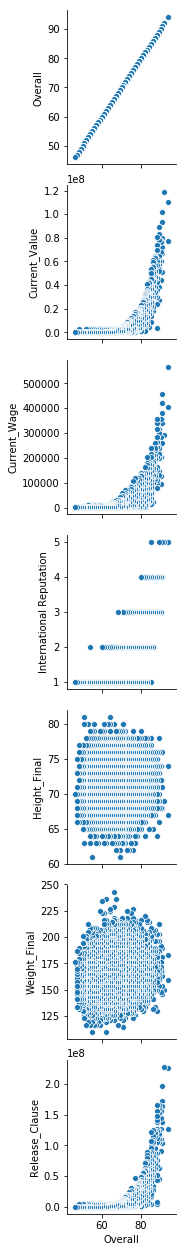

In [22]:
sns.pairplot(data=fifa,x_vars=['Overall'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

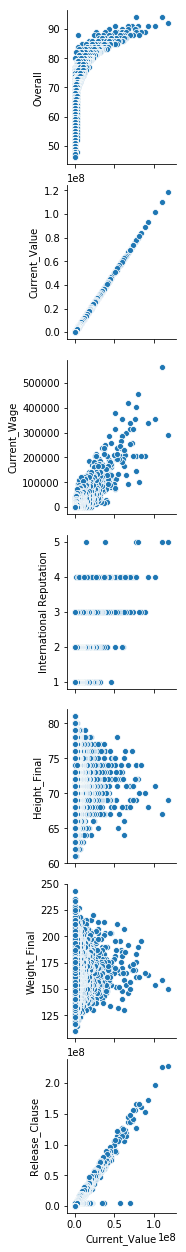

In [23]:
sns.pairplot(data=fifa,x_vars=['Current_Value'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

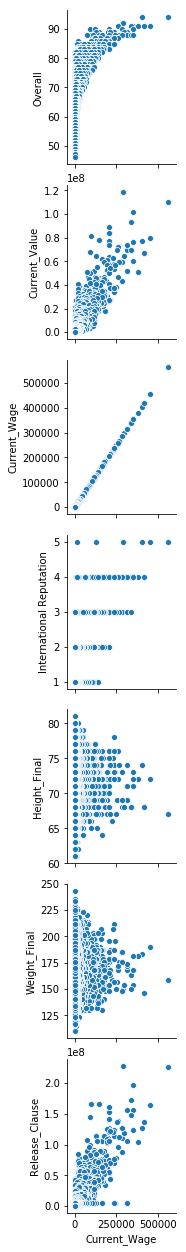

In [24]:
sns.pairplot(data=fifa,x_vars=['Current_Wage'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

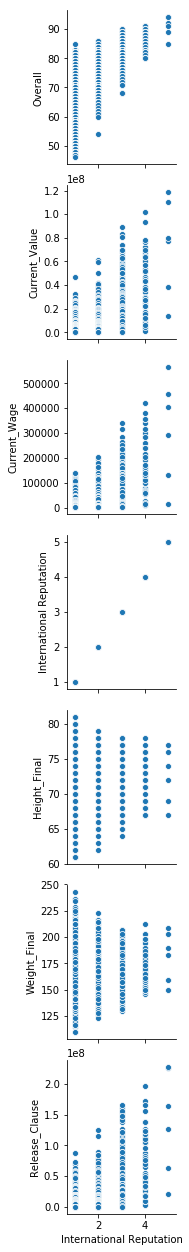

In [25]:
sns.pairplot(data=fifa,x_vars=['International Reputation'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

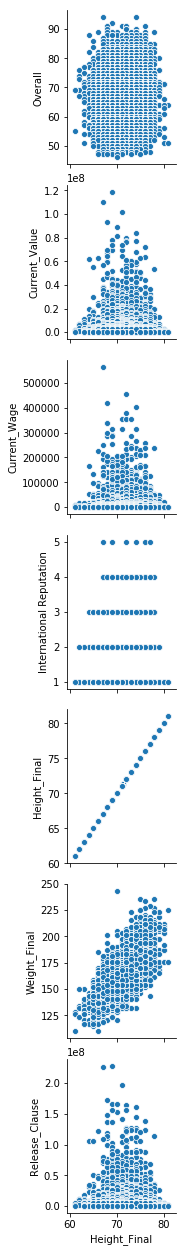

In [26]:
sns.pairplot(data=fifa,x_vars=['Height_Final'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

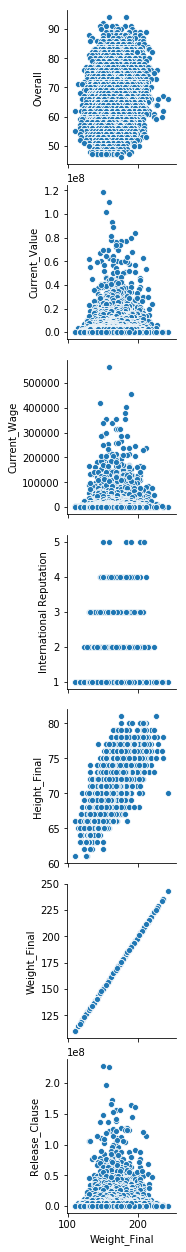

In [27]:
sns.pairplot(data=fifa,x_vars=['Weight_Final'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

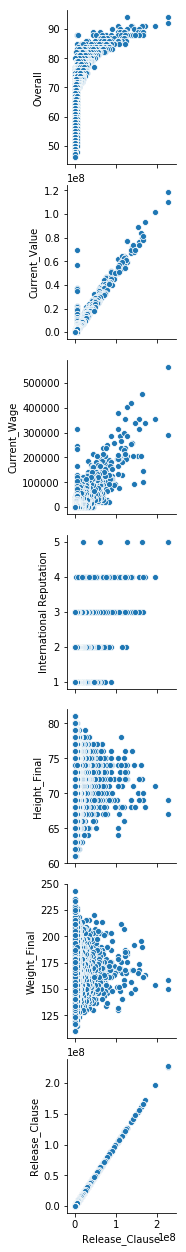

In [28]:
sns.pairplot(data=fifa,x_vars=['Release_Clause'],y_vars=['Overall', 'Current_Value', 'Current_Wage', 'International Reputation', 'Height_Final', 'Weight_Final', 'Release_Clause'])
plt.show()

In [29]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Loaned From', 'Contract Valid Until', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Current_Value',
       'Current_Wage', 'Year_Joined', 'Height_Final', 'Weight_Final',
       'Release_Clause'],
      dtype='object')

In [30]:
#3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
#a)What would the average wage for this set of players be?
#b)What is the average age?
#c)Is there a correlation between the Overall rating and Value for these players?

In [15]:
fifa['Contract Valid Until Year'] = fifa['Contract Valid Until'].apply(lambda d: str(d)[:4])
top20 = fifa.iloc[fifa[(fifa['Contract Valid Until Year']=='2020')].rank()['Overall'].sort_values(ascending=False).head(20).index]
top20

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2020
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,2020
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,2020
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,2020
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M,2020
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,€111M,2020
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M,2020
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M,2020
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M,2020
46,193041,K. Navas,31,https://cdn.sofifa.org/players/4/19/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,87,87,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,€62.5M,2020


In [32]:
top20.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Loaned From', 'Contract Valid Until', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Current_Value',
       'Current_Wage', 'Year_Joined', 'Height_Final', 'Weight_Final',
       'Release_Clause', 'Contract Valid Until Year'],
      dtype='object')

In [33]:
top20['Current_Wage'].mean()

205150.0

In [34]:
top20['Age'].mean()

29.95

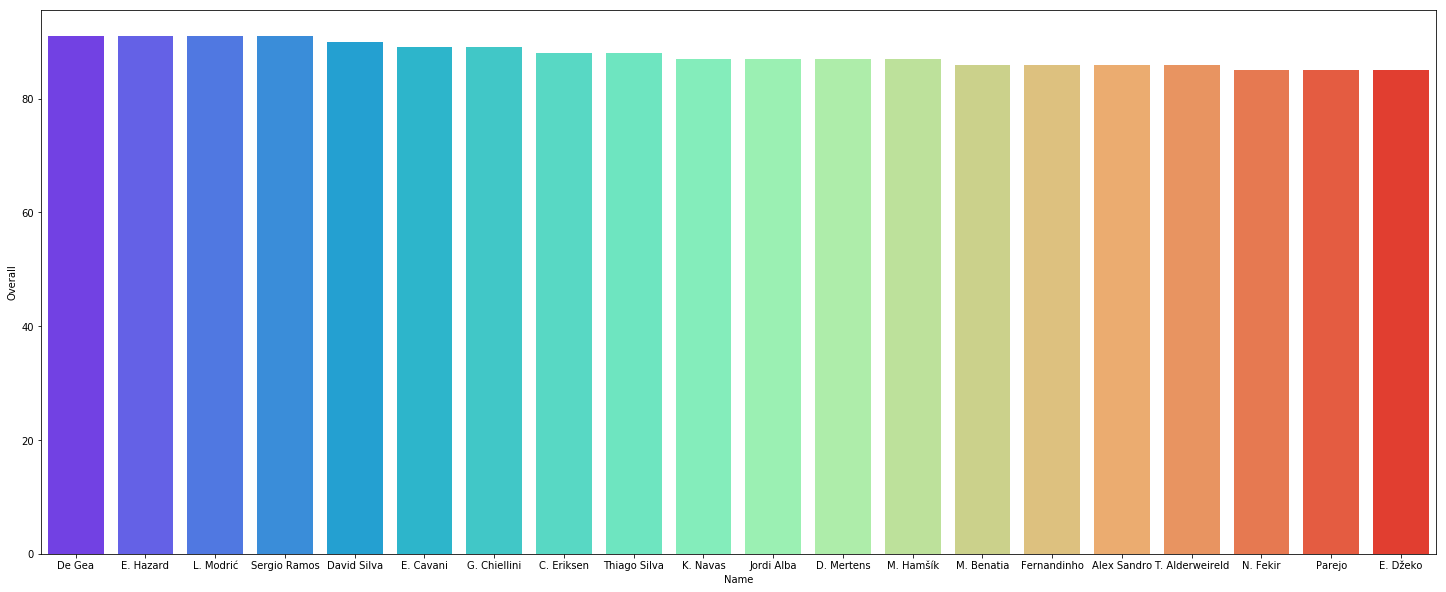

In [35]:
plt.figure(figsize=(25,10))
sns.barplot(data=top20,x='Name',y='Overall',palette='rainbow')
plt.show()

In [36]:
top20['Overall'].corr(top20['Current_Value'])  #yes, there is a correlation

0.6667878068079502

In [37]:
top20['Current_Value'].corr(top20['Overall'])   #yes, there is a correlation

0.6667878068079502

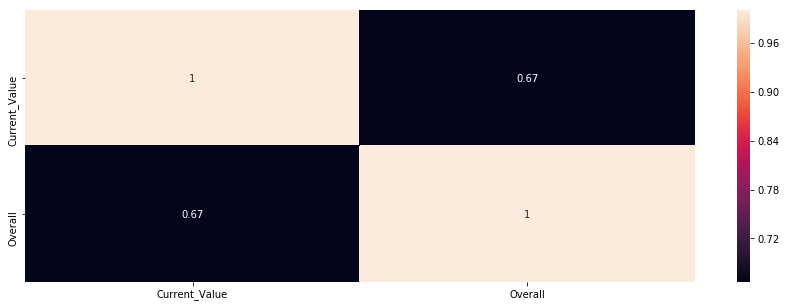

In [38]:
plt.figure(figsize=(15,5))
sns.heatmap(top20[['Current_Value','Overall']].corr(),annot=True)
plt.show()

<Figure size 1080x360 with 0 Axes>

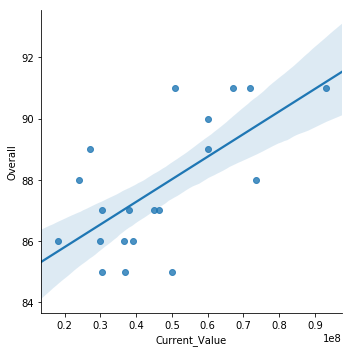

In [39]:
top20corr = top20[['Current_Value','Overall']].reset_index()
plt.figure(figsize=(15,5))
sns.lmplot(data=top20corr,x='Current_Value',y='Overall',ci=90)
plt.show()

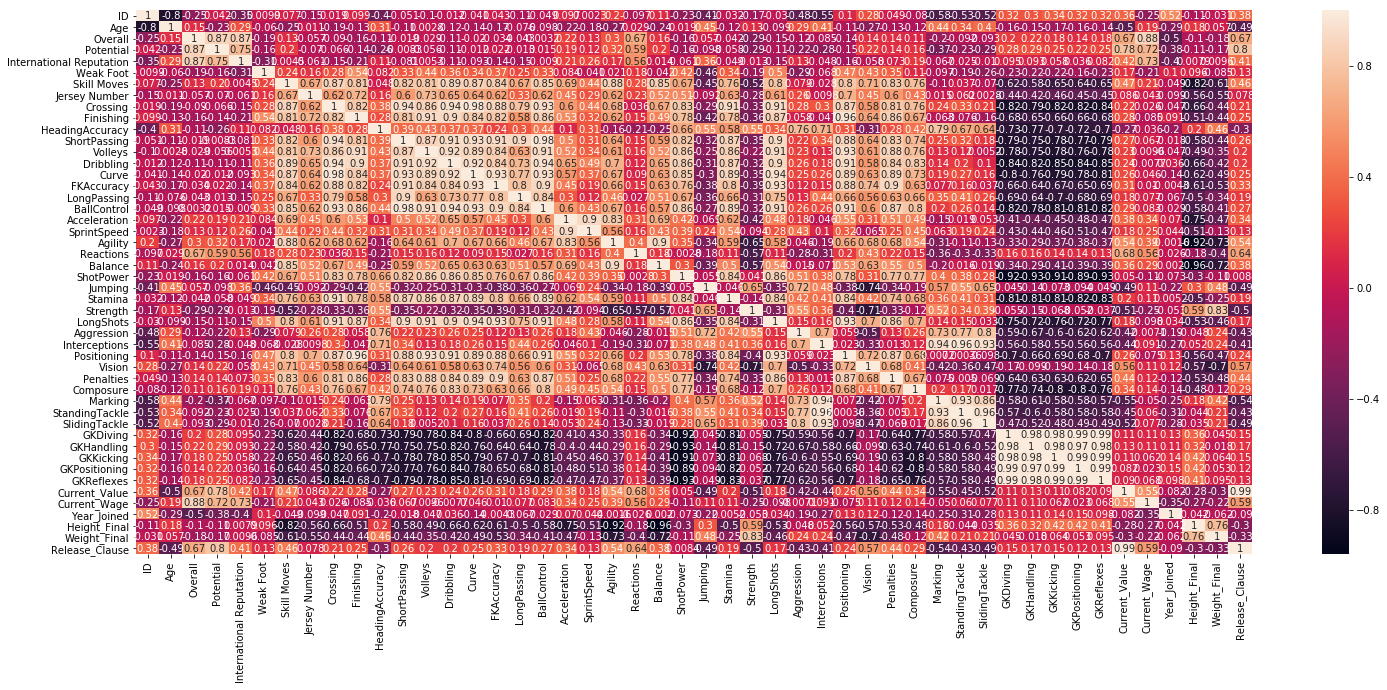

In [40]:
plt.figure(figsize=(25,10))
sns.heatmap(top20.corr(),annot=True)
plt.show()

In [41]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Loaned From', 'Contract Valid Until', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Current_Value',
       'Current_Wage', 'Year_Joined', 'Height_Final', 'Weight_Final',
       'Release_Clause', 'Contract Valid Until Year'],
      dtype='object')

In [42]:
#4.Generate tables containing the top 5 players by Overall rating for each unique position.
#a)Are there any players appearing in more than one Table. Please point out such players.
#b)What is the average wage one can expect to pay for the top 5 in every position?

In [43]:
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [44]:
def pos(posi):
    list1 = []
    for positions in posi:
        posit = fifa.iloc[fifa[(fifa['Position']==positions)].rank()['Overall'].sort_values(ascending=False).head(5).index]
        print(posit,"\n\n")
        print("Average wage for above position: ",posit['Current_Wage'].mean(),"\n\n\n\n\n")
        list1.append(posit['Name'])
    arr = np.array(list1)
    unique, counts = np.unique(arr, return_counts=True)
    dict1 = dict(zip(unique, counts))
    print(dict1)
    list2 = []
    for values in dict1.values():
        if values>1:
            list2.append(values)
    print(list2)
pos(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'])

          ID         Name  Age Nationality  Overall  Potential  \
0     158023     L. Messi   31   Argentina       94         94   
50    175943   D. Mertens   31     Belgium       87         87   
528   172114    D. Valeri   32   Argentina       80         80   
890   150516  L. Podolski   33     Germany       78         78   
1774  201313     C. Ciano   28       Italy       75         75   

                  Club Preferred Foot  International Reputation  Weak Foot  \
0         FC Barcelona           Left                       5.0        4.0   
50              Napoli          Right                       3.0        4.0   
528   Portland Timbers          Right                       2.0        3.0   
890        Vissel Kobe           Left                       3.0        3.0   
1774         Frosinone           Left                       1.0        4.0   

      ...  GKKicking GKPositioning GKReflexes Current_Value  Current_Wage  \
0     ...       15.0          14.0        8.0   110500000

         ID         Name  Age  Nationality  Overall  Potential  \
14   215914     N. Kanté   27       France       89         90   
91   187961     Paulinho   29       Brazil       85         85   
119  207865   Marquinhos   24       Brazil       84         89   
217  176266  Lucas Leiva   31       Brazil       83         83   
323  228702   F. de Jong   21  Netherlands       81         89   

                               Club Preferred Foot  International Reputation  \
14                          Chelsea          Right                       3.0   
91   Guangzhou Evergrande Taobao FC          Right                       3.0   
119             Paris Saint-Germain          Right                       3.0   
217                           Lazio          Right                       3.0   
323                            Ajax          Right                       1.0   

     Weak Foot  ...  GKKicking GKPositioning GKReflexes Current_Value  \
14         3.0  ...       10.0           7.0     

[5 rows x 58 columns] 


Average wage for above position:  162000.0 





         ID           Name  Age Nationality  Overall  Potential  \
25   231747      K. Mbappé   19      France       88         95   
26   209331       M. Salah   26       Egypt       88         89   
122  204970     F. Thauvin   25      France       84         87   
137  185020  José Callejón   31       Spain       84         84   
138  183898    A. Di María   30   Argentina       84         84   

                       Club Preferred Foot  International Reputation  \
25      Paris Saint-Germain          Right                       3.0   
26                Liverpool           Left                       3.0   
122  Olympique de Marseille           Left                       2.0   
137                  Napoli          Right                       3.0   
138     Paris Saint-Germain           Left                       4.0   

     Weak Foot  ...  GKKicking GKPositioning GKReflexes Current_Value  \
25         4.0  .

         ID                 Name  Age Nationality  Overall  Potential  \
67   189509               Thiago   27       Spain       86         86   
78   223848  S. Milinković-Savić   23      Serbia       85         90   
121  205498             Jorginho   26       Italy       84         87   
136  186942          I. Gündoğan   27     Germany       84         84   
161  220971             N. Keïta   23      Guinea       83         88   

                  Club Preferred Foot  International Reputation  Weak Foot  \
67   FC Bayern München          Right                       3.0        3.0   
78               Lazio          Right                       2.0        4.0   
121            Chelsea          Right                       2.0        3.0   
136    Manchester City          Right                       3.0        4.0   
161          Liverpool          Right                       2.0        4.0   

     ...  GKKicking GKPositioning GKReflexes Current_Value  Current_Wage  \
67   ...        

In [45]:
#All operations done in the above code. An empty list was returned, which shows that no prayers were common in the tables 
#were printed. Average wage for each position has been printed above after every table
#See the boxplot below, to observe the 'Overall' values for each position

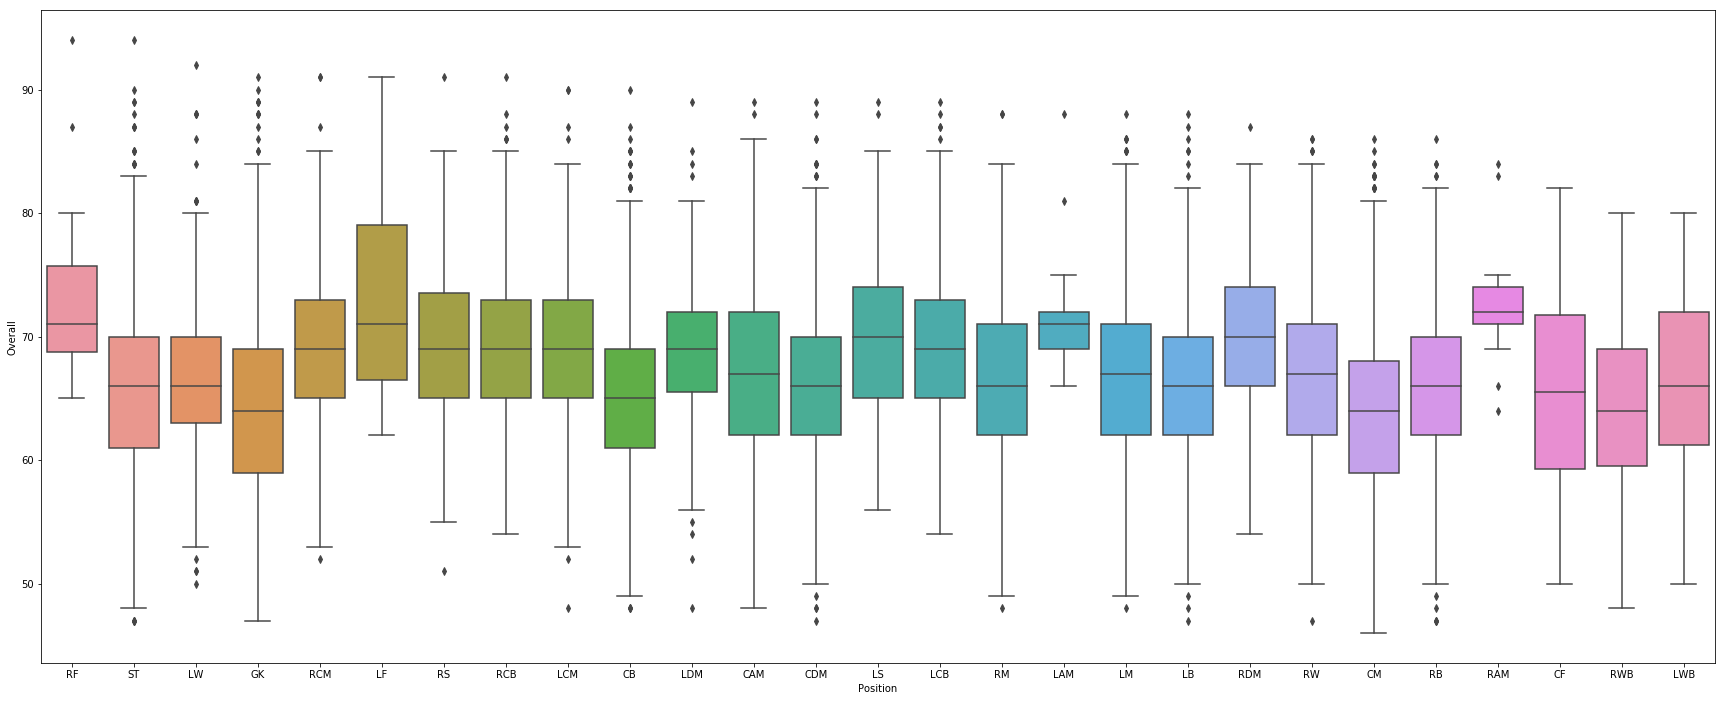

In [46]:
plt.figure(figsize=(30,12))
fifa1 = fifa[['Position','Overall']].dropna(how='any')
sns.boxplot(data=fifa1,x='Position',y='Overall')
plt.show()

In [47]:
a = ['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
for positions in a:
    print(positions,fifa.iloc[fifa[(fifa['Position']==positions)].rank()['Overall'].sort_values(ascending=False).head(5).index]['Current_Wage'].mean())

RF 148000.0
ST 294000.0
LW 261000.0
GK 192800.0
RCM 240800.0
LF 123200.0
RS 132200.0
RCB 231000.0
LCM 184400.0
CB 139600.0
LDM 126600.0
CAM 174000.0
CDM 217000.0
LS 130200.0
LCB 162000.0
RM 131400.0
LAM 81600.0
LM 164600.0
LB 177200.0
RDM 105000.0
RW 202000.0
CM 130600.0
RB 155400.0
RAM 45400.0
CF 47400.0
RWB 44200.0
LWB 34200.0
